# Normal Distribution

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns 

Let's visualize the normal distribution, for doing so, we generate a million samples and plot them.

In [7]:
mean = 36
std = 6

og_dist = np.random.normal(loc=mean, scale=std, size=int(1e6))

cmean = round(np.mean(og_dist),1)
cstd = round(np.std(og_dist),1)

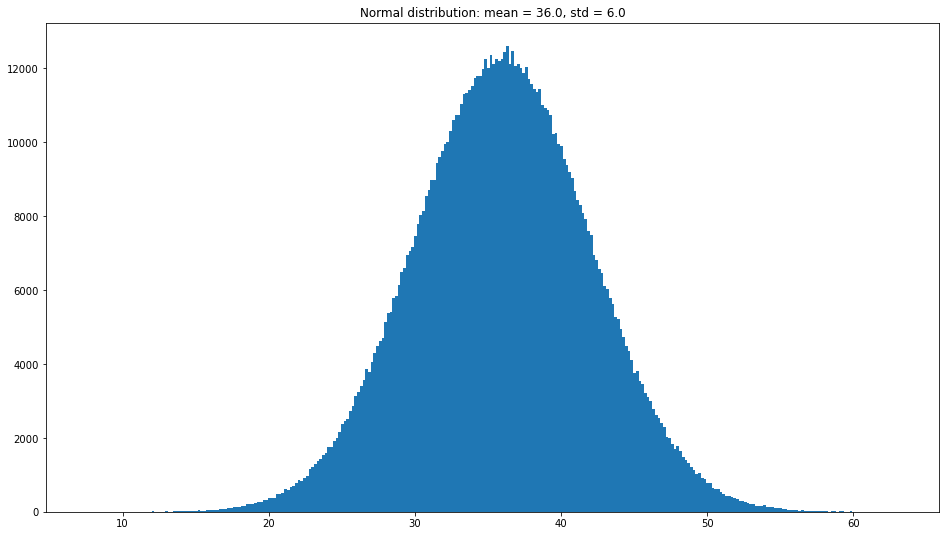

In [8]:
plt.figure(figsize=(16, 9))
plt.title(f'Normal distribution: mean = {cmean}, std = {cstd}')
plt.hist(og_dist, bins=300)
plt.show()

# The Central Limit Theorem

*The central limit theorem (CLT) establishes that, in many situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a bell curve) even if the original variables themselves are not normally distributed.* 

*The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.* [wiki](https://en.wikipedia.org/wiki/Central_limit_theorem)

![](ctl.png)

In [9]:
def clt(og_dist, sample_size, n_samples):
    """
    To calculate the central limit theorem we need
    a sample size and the number of samples to retreive
    """
    result = []
    for _ in range(n_samples):
        #Randomly take n_samples of size sample_size from the original distribution
        #and record its average
        result.append(np.mean(np.random.choice(og_dist, sample_size, replace=False)))
    return result

Let's take 200 samples of 36 samples each from the original distribution.

In [14]:
s_dist = clt(og_dist, 36, 200)

mean = round(np.mean(s_dist),2)
std = round(np.std(s_dist),2)

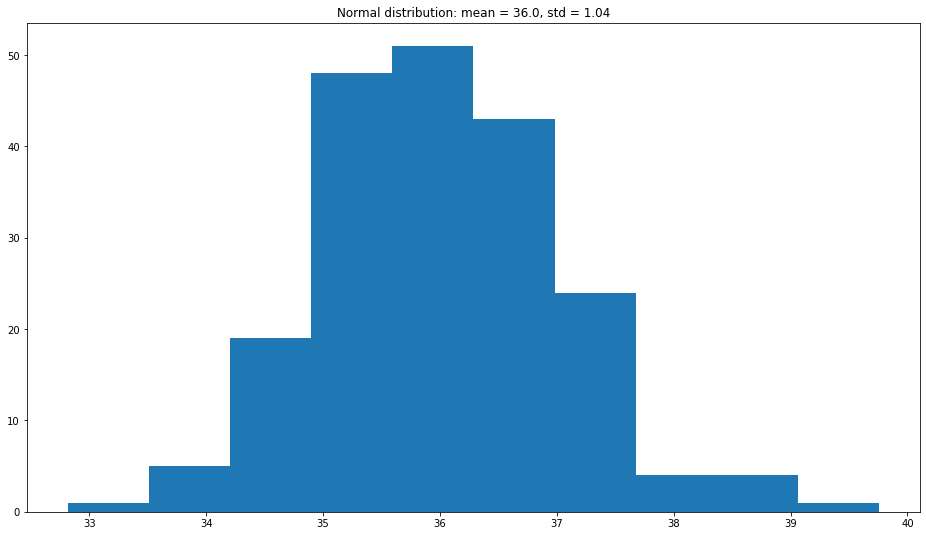

In [15]:
plt.figure(figsize=(16, 9))
plt.title(f'Normal distribution: mean = {mean}, std = {std}')
plt.hist(s_dist)
plt.show()

We see here that we have a nice normal distribution with mean close to the mean of the original and a standard deviation of the sampling distribution = our original standard deviation divided by the square root of the sample size.

In [21]:
og_std = 6
sample_size = 36
print(og_std/sample_size**0.5)

1.0


# Uniform (discrete) distribution

Let's repeat the experiment with a different distribution. It will be a discrete distribution that is uniformly spead between a range.

In [24]:
og_dist = np.round(np.random.uniform(low=20, high=52, size=1000000),0)

mean = round(np.mean(og_dist),1)
std = round(np.std(og_dist),1)

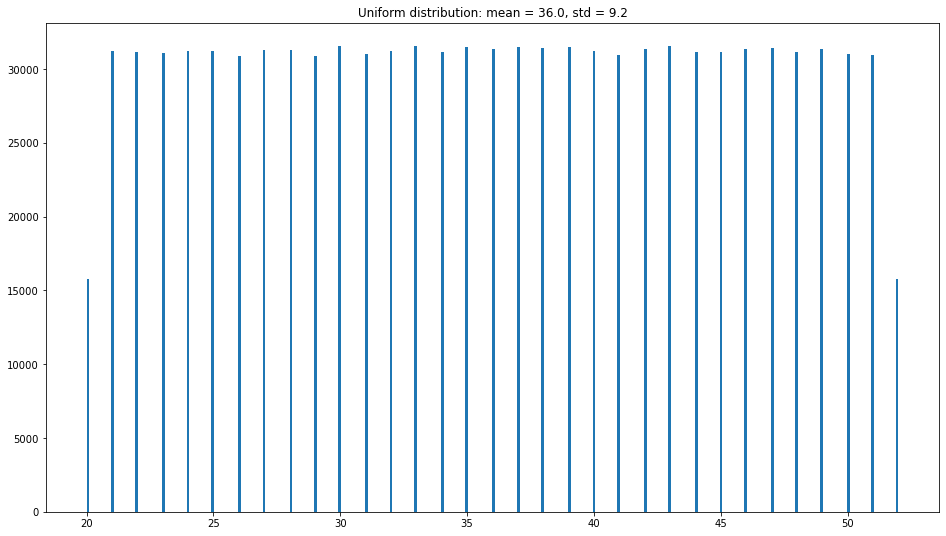

In [25]:
plt.figure(figsize=(16, 9))
plt.title(f'Uniform distribution: mean = {mean}, std = {std}')
plt.hist(og_dist, bins=300)
plt.show()

We follow the same procedure as last time.

In [26]:
s_dist = clt(og_dist, 36, 200)

mean = round(np.mean(s_dist),2)
std = round(np.std(s_dist),2)

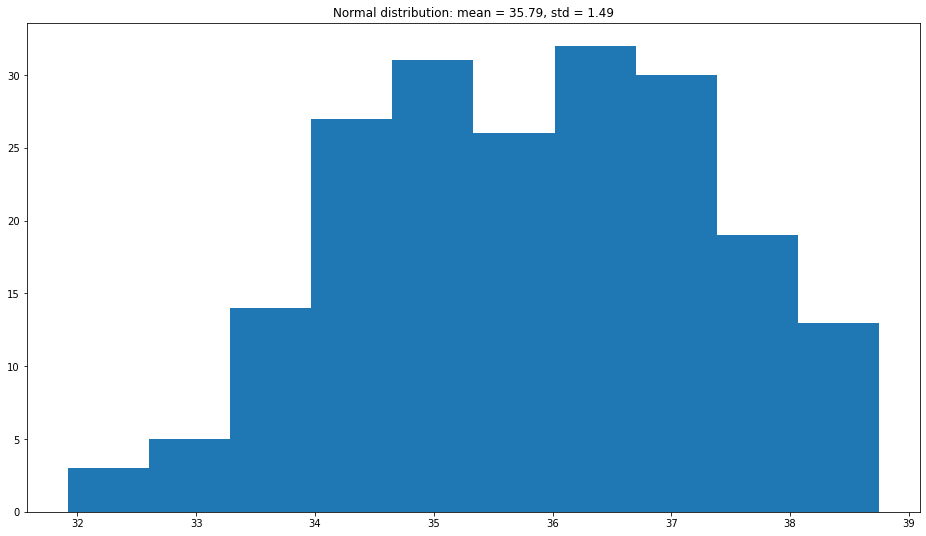

In [27]:
plt.figure(figsize=(16, 9))
plt.title(f'Normal distribution: mean = {mean}, std = {std}')
plt.hist(s_dist)
plt.show()

In [28]:
og_std = 9.2
sample_size = 36
print(og_std/sample_size**0.5)

1.5333333333333332


# Example

A client of FedEx wants to deliver urgently a large freight from Texas to Denver. When asked about the weight of the cargo
they could not share the exact weight, however, they have specified that there are total of 36 boxes.

You are working as a data scientist for FedEx. And you have been challenged to tell the executives quickly whether or not
they can do this delivery.

Since, we have worked with them for so many years and have seen so many freights from them we can confidently say that
the type of cargo they follow has a weight distribution with a mean of μ= 72 lb and a standard deviation of σ = 3 lb
The plane we have can carry max cargo weight upto 2640 lb..
Based on this information what is the probability that all of the cargo can be safely loaded onto the planes and transported?

**Steps:**
> 1. Using CLT, find the mean and std deviation of the sample mean.
> 2. Next, calculate the critical mass (X crit) of each box by dividing the allowable capacity of the plane to carry weight
with the total number of boxes. So, to safely take off the plane, the average weight of the each box should not
exceed 73.06 lb/box.
> 3. Finally, calculate the Z-score and get the probability

Identify variables
- Population Mean = 72 lb
- Population Standard Deviation = 3 lb
- Max. Capacity = 2640 lb
- Sample size = 36 boxes

**Note that the population distribution could be anything (and we do not care as long as we know the mean and the standard deviation).**

- Since these boxes come from our initial distribution which has a mean of 72, that will be also the mean of our new sampling distribution.

- The standard deviation of the sampling distribution (or standard error) is the standard deviation from our original distribution / sqrt(sample size).

**How is this different? We KNOW the population parameters. We don't know anything about the sample (other than the number of boxes)**

In [30]:
sample_size = 36            #num of boxes
samp_dist_mean = mean = 72  #Population mean which we assign as well  
std = 3                     #Population std
samp_dist_std = std / sample_size**0.5 #We infer the standard deviation of the sample usint clt

print(f'Mean of the samplinng distribution: {samp_dist_mean}')
print(f'Standard deviation of the sampling distribution: {samp_dist_std}')

Mean of the samplinng distribution: 72
Standard deviation of the sampling distribution: 0.5


The critical mass per box equals the maximum mean weight the boxes can have so that collectively they do not exceed the capacity of the plane.

In [31]:
max_capacity = 2640
max_mean = 2640 / sample_size

print(f'Maximum average weight per box: {max_mean}')

Maximum average weight per box: 73.33333333333333


We calculate the z score using the information of our sampling distribution, we want to answer the question, what is the probability that the weight of the boxes exceeds the maximum capacity in the plane?

In [32]:
def z_score(x, mean, std):
    return (x-mean) / std

z = z_score(max_mean, samp_dist_mean, samp_dist_std)
print(f'The z_score is {z}')

The z_score is 2.666666666666657


- Refresher, what is the Z score? is the number of standard deviations from the mean. The farther away a value is, the more unlikely it will be.

With this value and using what we learn in the previous session, we get the probability with our z score, that is what is the probability that we the boxes will be in the safe zone (below the average critical weight per box).

In [34]:
prob = stats.norm.cdf(z)
print(f'Probability to safely takeoff is {round(100*prob,2)}%')

Probability to safely takeoff is 99.62%


**The fact that there are many boxes, allows us to be more confident that we will not exceed the critical weight. That is because with many boxes the heavy ones will balance with the light ones and their collective mean will be very close to the population mean.**

Below the same example but with 5 boxes.

In [41]:
sample_size = 5             #num of boxes
samp_dist_mean = mean = 72  #Population mean which we assign as well  
std = 3                     #Population std
samp_dist_std = std / sample_size**0.5 #We infer the standard deviation of the sample usint clt

print(f'Mean of the samplinng distribution: {samp_dist_mean}')
print(f'Standard deviation of the sampling distribution: {samp_dist_std}')

max_capacity = 2640 * (sample_size/36)
max_mean = max_capacity / sample_size

print(f'Maximum average weight per box: {max_mean}')

z = z_score(max_mean, samp_dist_mean, samp_dist_std)
print(f'The z_score is {z}')

prob = stats.norm.cdf(z)
print(f'Probability to safely takeoff is {round(100*prob,2)}%')

Mean of the samplinng distribution: 72
Standard deviation of the sampling distribution: 1.3416407864998738
Maximum average weight per box: 73.33333333333334
The z_score is 0.9938079899999136
Probability to safely takeoff is 83.98%


# Type I and Type II errors 
### - Also know as False Positives / False Negatives


![](errors.jpg)

- Null Hypothesis (Ho): Person is not pregnant
- Alternate Hypothesis (Ha): Person is pregnant


- Type I error: Reject Ho when is true (Claim pregnancy when there is not)
- Type II error: Fail to reject Ho when is false (Claim not pregnancy when it is)

# Confidence Intervals

*In statistics, a confidence interval (CI) is a type of estimate computed from the statistics of the observed data. This proposes a range of plausible values for an unknown parameter (for example, the mean). The interval has an associated confidence level that the true parameter is in the proposed range. The confidence level is chosen by the investigator. For a given estimation in a given sample, using a higher confidence level generates a wider (i.e., less precise) confidence interval. In general terms, a confidence interval for an unknown parameter is based on sampling the distribution of a corresponding estimator.*

*This means that the confidence level represents the theoretical long-run frequency (i.e., the proportion) of confidence intervals that contain the true value of the unknown population parameter. In other words, 90% of confidence intervals computed at the 90% confidence level contain the parameter, 95% of confidence intervals computed at the 95% confidence level contain the parameter, 99% of confidence intervals computed at the 99% confidence level contain the parameter, etc.*

*The confidence level is designated before examining the data. Most commonly, a 95% confidence level is used. However, other confidence levels, such as 90% or 99%, are sometimes used.* [wiki](https://en.wikipedia.org/wiki/Confidence_interval)

- See below the trade-off, the more confident we want to be that the data is within our interval (by making it bigger), the wider our interval needs to be.
- In the same way, the bigger our confidence interval, the more difficult to reject the null hypothesis, the more difficult it is to get a result outside our confidence interval due to chance. 

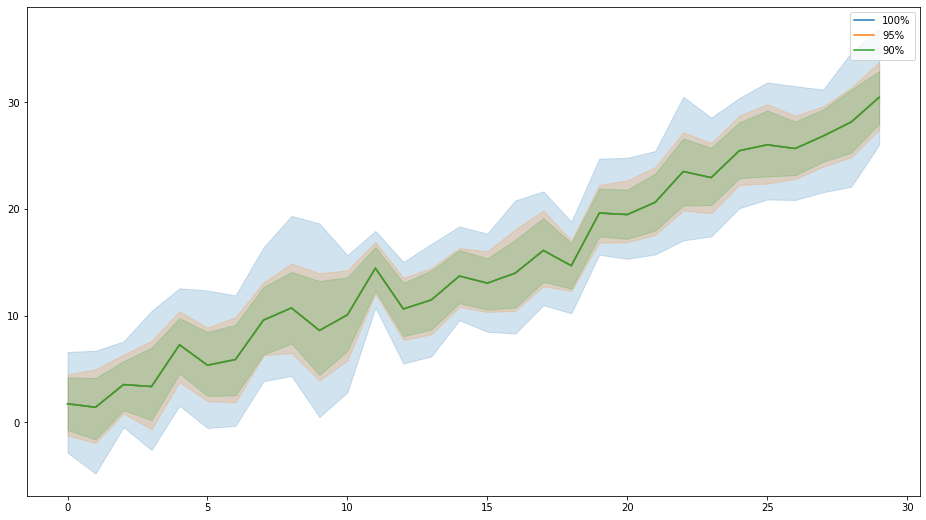

In [56]:
x = np.random.randint(0, 30, 1000) 
y = x + np.random.normal(0, 10, 1000) 

plt.figure(figsize=(16,9))
# create lineplot 
sns.lineplot(x, y, ci=100)
sns.lineplot(x, y, ci=95)
sns.lineplot(x, y, ci=90)
plt.legend(['100%', '95%', '90%'])
plt.show()

# Example

Suppose we are manufacturing cricket balls, which are required to weigh around 145 grams for use in the major league. We
just started using a new supplier for some of the raw materials. Assume that we have randomly sampled 50 cricket balls
from the first batch that uses the new materials. From that sample, we have calculated an average weight of 145.59 grams,
and those samples have a standard deviation of 1.67 grams.

- Construct a 95% confidence interval
- Construct a 99% confidence interval

Identify variables
- Weight around 145 grams
- We sampled 50 balls, sample size or n
- Mean of the sample = 145.59
- Standard deviation of the sample = 1.67 grams

- We calculate the confidence intervals, we want to check for 95% and 99%. 
- With the % we have we can calculate the Z score or number of standard deviations away from the mean.
- Remember that 95% means removing 2.5% from the lower tail and 2.5% from the upper tail
- 99% means removing .5% from the lower tail and .5% from the upper tail

In [61]:
z_95 = stats.norm.ppf(0.975) #95% -> 2.5% up / 2.5% down
print(z_95)
z_99 = stats.norm.ppf(0.995) #99% -> 0.5% up / 0.5% down
print(z_99)

1.959963984540054
2.5758293035489004


We follow up with calculations from the clt.

In [58]:
mean = 145.59
std = 1.67
n = 50

std_error_estimate = std / 50 ** 0.5
std_error_estimate

0.23617366491630684

And calculate the confidence intervals.

In [59]:
print(f'Confidence interval 95%: {mean-z_95*std_error_estimate} - {mean+z_95*std_error_estimate}')
print(f'Confidence interval 99%: {mean-z_99*std_error_estimate} - {mean+z_99*std_error_estimate}')

Confidence interval 95%: 145.1271081226672 - 146.0528918773328
Confidence interval 99%: 144.98165695318204 - 146.19834304681797


What is this telling us? 
- It is very likely that the new balls will be out of specification

# One sample Z test

Tom is working in a credit card processing company as a team leader. His team is responsible to validate certain data for
new credit card applications. The time spent by his team on an application is normally distributed with average 300
minutes and standard deviation 40 minutes.

Tom and his team worked on process improvement to reduce the time spent in processing new applications. After
implementing the improvements, Tom checked the time spent by his team on randomly selected 25 new card applications.
The average time spent is 290 min. Tom is happy that, though it is a small improvement, it is a step in right direction. He
shares the good news with his manager Lisa. But Lisa in not convinced about the improvement.
At 95% confidence, has the processes really improved?

In [56]:
Ho = 'mean time is still equal to or greater than 300 min' 
Ha = 'mean time is smaller than 300 min'

In [75]:
mean = 300 #Previous average, Ha be smaller than this
std = 40   
n = 25     #N samples
 
sample_mean = 290

confidence = 0.95 #one tail! we only want to check if it is smaller

In [76]:
z_score = (sample_mean-mean) / (std / n**0.5)
print(z_score)

-1.25


In [77]:
#Needed z score:
stats.norm.ppf(1-confidence)

-1.6448536269514722

With 95% confidence, we cannot claim that the process has improved, we fail to reject the null hypothesis

But what could be changed?
- We are willing to be "less confident"
- We have a bigger sample size
- We have a lower mean

In [78]:
#Being less confident, say 85%
stats.norm.ppf(0.15)

-1.0364333894937898

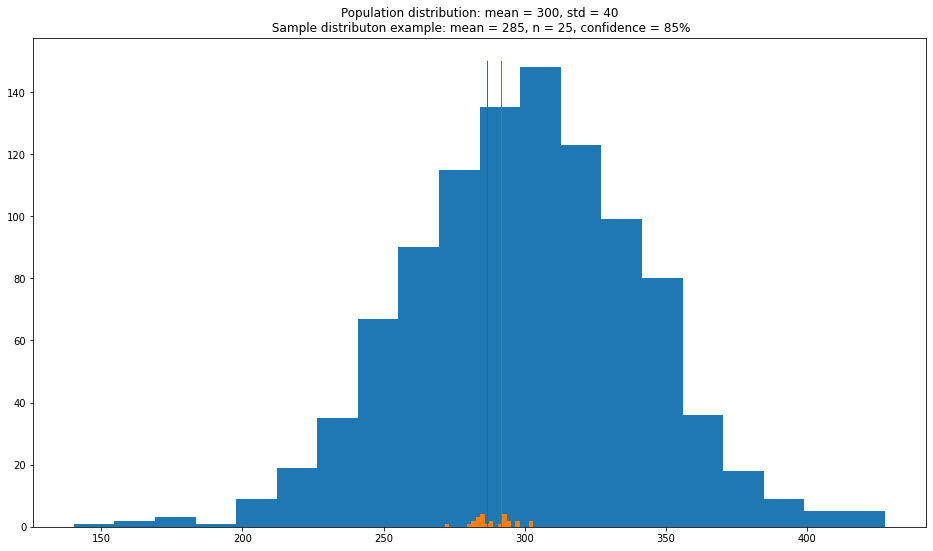

In [209]:
plt.figure(figsize=(16, 9))
plt.title(f'Population distribution: mean = {mean}, std = {std}\n Sample distributon example: mean = {sample_mean}, n = {n}, confidence = 85%')
plt.hist(np.random.normal(mean, std, 1000), bins=20)
plt.hist(np.random.normal(sample_mean, std/n**0.5, n), bins=20)
plt.hist([300+stats.norm.ppf(0.15)*std/25**0.5]*150)
plt.hist([300+stats.norm.ppf(0.05)*std/25**0.5]*150)
plt.show()

In [80]:
#Having a bigger sample size
#say 49
n = 49
sample_mean = 290
z_score = (sample_mean-mean) / (std/n**0.5)
print(z_score)

-1.75


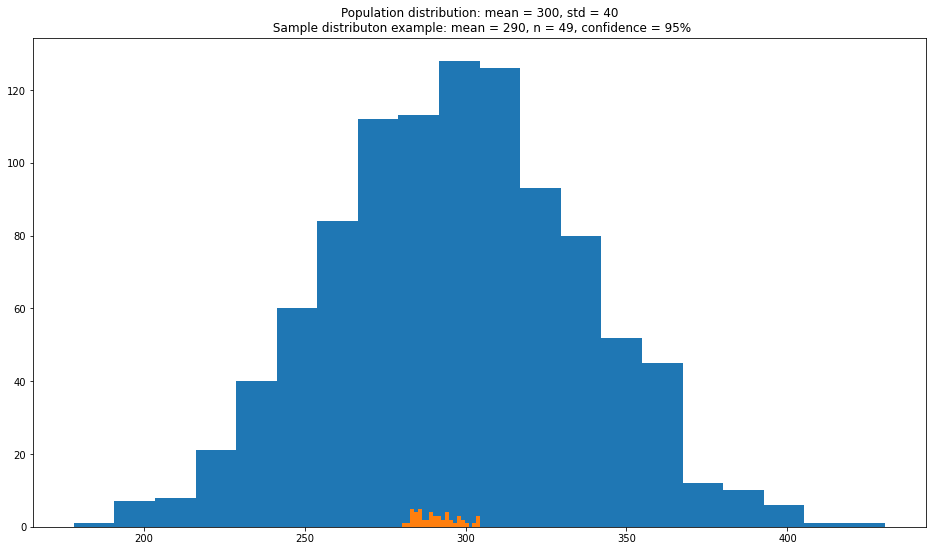

In [190]:
plt.figure(figsize=(16, 9))
plt.title(f'Population distribution: mean = {mean}, std = {std}\n Sample distributon example: mean = {sample_mean}, n = {n}, confidence = 95%')
plt.hist(np.random.normal(mean, std, 1000), bins=20)
plt.hist(np.random.normal(sample_mean, std/n**0.5, n), bins=20)
plt.show()

In [81]:
#Having a lower mean
n = 25
sample_mean = 285

z_score = (sample_mean-mean) / (std/n**0.5)
print(z_score)

-1.875


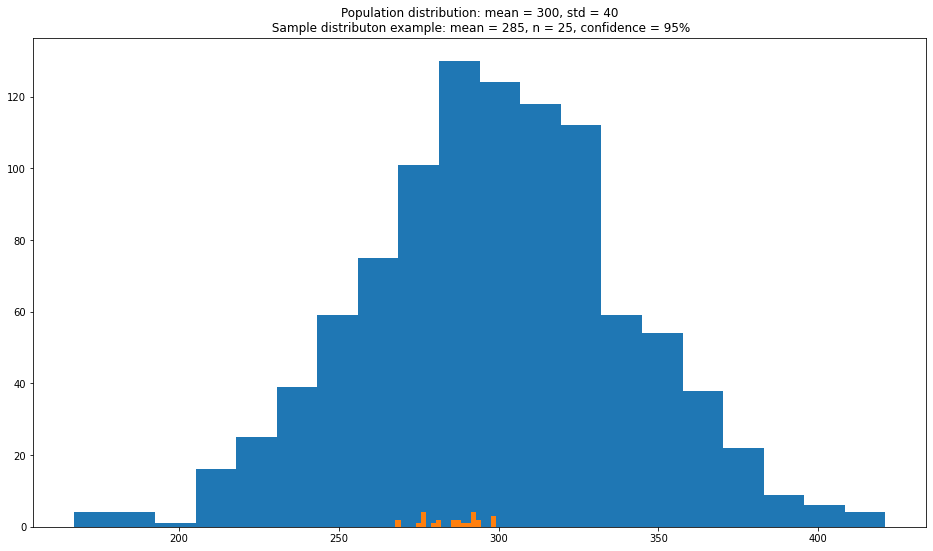

In [192]:
plt.figure(figsize=(16, 9))
plt.title(f'Population distribution: mean = {mean}, std = {std}\n Sample distributon example: mean = {sample_mean}, n = {n}, confidence = 95%')
plt.hist(np.random.normal(mean, std, 1000), bins=20)
plt.hist(np.random.normal(sample_mean, std/n**0.5, n), bins=20)
plt.show()

# Two sample Z test

To compare customer satisfaction levels of two competing cable television companies, 170 customers of Company 1 and
350 customers of Company 2 were randomly selected and were asked to rate their cable companies on a five-point scale,
with 1 being least satisfied and 5 most satisfied. The survey results are summarized in the following table:


Test at the 0.05 level of significance whether the data provide sufficient evidence to conclude that Company 1 has a
higher mean satisfaction rating than Company 2.

What is relevant? we have 2 different distributioons with different parameters each.

In [84]:
#Company 1 
n1 = 170
mean1 = 3.51
std1 = 0.51

#Company 2 
n2 = 350
mean2 = 3.24
std2 = 0.52

sig = 0.05

- Ho: mean1 - mean2 <= 0
- Ha: mean1 - mean2 > 0

[Link](https://www.cliffsnotes.com/study-guides/statistics/univariate-inferential-tests/two-sample-z-test-for-comparing-two-means)

In [85]:
def two_sample_z(mean1, mean2, std1, std2, n1, n2, delta=0):
    """
    We want to compare 2 sampled distributions.
    """
    return ((mean1-mean2) - delta) / ((std1**2/n1)+(std2**2/n2))**0.5

In [86]:
two_sample_z(mean1, mean2, std1, std2, n1, n2)

5.626744672973926

Calculate the critical values

In [88]:
stats.norm.ppf(0.95)

1.6448536269514722

Since the value is beyond the critical value, we reject the null hypothesis and conclude that Company 1 has higher mean satisfactio rating than company 2.

*Disclaimer: In practice, the two‐sample z‐test is not used often, because the two population standard deviations σ 1 and σ 2 are usually unknown. Instead, sample standard deviations and the t‐distribution are used.*

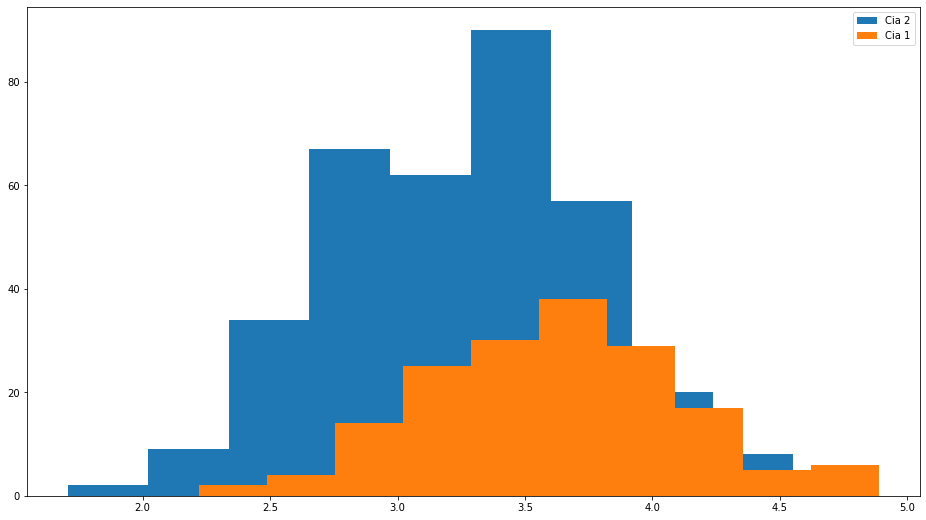

In [89]:
plt.figure(figsize=(16, 9))
plt.hist(np.random.normal(mean2, std2, n2))
plt.hist(np.random.normal(mean1, std1, n1))
plt.legend(['Cia 2', 'Cia 1'])
plt.show()

# One Sample T Test

You are the manager of a company that wants to improve sales. Past sales data indicates that the average sale was 100
per transaction. After training your sales force, recent sales data (taken from a sample of 25 salesmen) indicates an average
sale of 130, with a standard deviation of $15. Did the training work? Test your hypothesis at a 5% significance level.

In [91]:
mu0 = 100
n = 25
mean1 = 130
std = 15

In [92]:
def one_ttest(mean1, mu0, std, n):
    return (mean1 - mu0) / (std/n**0.5)

In [93]:
one_ttest(mean1, mu0, std, n)

10.0

In [94]:
stats.t.ppf(0.95, 25) # The higher the number, the closer it gets to the z value of normal distributions

1.7081407612518986

In [95]:
print(stats.norm.ppf(0.95))

1.6448536269514722


In [96]:
print(stats.norm.ppf(0.95))
print(stats.t.ppf(0.95, 30))

1.6448536269514722
1.6972608943617378


Since 10 is > 1.75 at 95% conficence, we reject the null hypothesis and conclude that the training has worked.